<a href="https://colab.research.google.com/github/dasmiq/cs6200-hw1/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [ ]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2021-10-04 15:41:07--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2021-10-04 15:41:07--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2021-10-04 15:41:08--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [ ]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this data, field can be `body` or `title`.

In [ ]:
terms[1:10]


[{'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of there basic term statistics. You can make your like easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [ ]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.

import pandas as pd
df = pd.DataFrame(terms) #converting list of dictionaries into a panda data frame
df_s = df.groupby(['term','id'], as_index = False).agg({'count': 'sum'}) #second dataframe that has a total count for each word in each document (for words that
#appear in the title as well as the body in a document, count will now store the total count)

df_1 = df_s[df_s['id'] == "APW_ENG_20100101.0001"] #create new dataframe df_1 containing records from document ID APW_ENG_20100101.0001
df_2 = df_1.sort_values(by='count', ascending=False).reset_index() #sort the df_1 with count in decreasing order and store result in df_2
print(df_2[["term", "count"]].head(6)) #return the first 6 entrees

     term  count
0       a     16
1     the     11
2      to     10
3  brooks     10
4      of     10
5     and     10


In [ ]:
# TODO: Print the 6 terms from document APW_ENG_20100102.0077 with the highest count.
df_1 = df_s[df_s['id'] == "APW_ENG_20100102.0077"] #create new dataframe df_1 containing records from document ID APW_ENG_20100102.0077
df_2 = df_1.sort_values(by='count', ascending=False).reset_index() #sort the df_1 with count in decreasing order and store result in df_2
print(df_2[["term", "count"]].head(6)) #return the first 6 entrees

  term  count
0  the     50
1   to     22
2   in     21
3  and     19
4    a     14
5   of     14


In [ ]:
# TODO: Print the 6 terms with the highest total count in the corpus.
df_1 = df_s.groupby('term').sum() #grouping the terms and then summing the count
df_2 = df_1.sort_values(by='count', ascending=False).reset_index() #putting counts in decreasing order
print(df_2.head(6)) #extracting first 6 entrees


  term  count
0  the  62216
1   to  26931
2   in  25659
3    a  23383
4   of  22326
5  and  22125


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [ ]:
# TODO: Compute the number of distinct documents in the collection.
N = len(pd.unique(df_s['id']))
print("No.of distinct documents in the collection is :", 
      N)

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
df_ = dict()
df_1 = df_s.groupby('term').count() #group by the term and count the document IDs for each term
for index, row in df_1.iterrows(): #creates dictionary containing a count of distinct documents each term appears in 
  df_[row.name] = row.id

#sample outputs:
print("No. of distinct documents that contain 'a': " + str(df_['a'])) #just for you to see that the dictionary has been created
print("No. of distinct documents that contain 'the': " + str(df_['the']))

No.of distinct documents in the collection is : 2778
No. of distinct documents that contain 'a': 2571
No. of distinct documents that contain 'the': 2696


In [ ]:
# TODO: Print the relative document frequency of 'the',
# i.e., the proportion of documents that contain 'the'.
print((df_['the'])/N) #number of distinct documents "the" appears in divided by the total number of documents

0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [ ]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
import math
tfidf_terms = None
list_ = []
for index,row in df_s.iterrows():
  tf = math.log(row[2] +1)
  idf = math.log(N/df_[row[0]])
  list_.append(tf*idf)
df_s['tf-idf'] = list_ 
print(df_s)

           term                     id  count    tf-idf
0             a  APW_ENG_20100101.0001     16  0.219394
1             a  APW_ENG_20100102.0001     26  0.255217
2             a  APW_ENG_20100102.0002     27  0.258034
3             a  APW_ENG_20100102.0003     19  0.231978
4             a  APW_ENG_20100102.0005      4  0.124629
...         ...                    ...    ...       ...
524173   zverev  APW_ENG_20100105.0509      1  3.773895
524174   zverev  APW_ENG_20100105.0549      1  3.773895
524175  zvornik  APW_ENG_20100103.0487      1  5.496301
524176   zwolle  APW_ENG_20100106.0803      2  7.949931
524177   zwolle  APW_ENG_20100106.0878      2  7.949931

[524178 rows x 4 columns]


In [ ]:
# TODO: Print the 20 records with the highest tf-idf values.
df_1 = df_s.sort_values(by='tf-idf', ascending=False).reset_index()
print(df_1[["term", 'tf-idf']].head(20)) #20 records with highest tf-idf values 

           term     tf-idf
0       guarani  23.292878
1    nomination  22.519372
2     greyhound  21.985205
3       methane  21.985205
4        kheire  21.473448
5   shakespeare  21.306960
6         guild  20.667543
7   shakespeare  20.502093
8         magna  20.338731
9       elkhart  20.338731
10       sutton  20.225285
11        tohti  19.704034
12       minhas  19.704034
13   greyhounds  19.704034
14        krewe  19.704034
15      shiites  19.704034
16         punk  19.596370
17     netbooks  19.353324
18     netbooks  19.353324
19       golden  19.302647


## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [ ]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
df_1 = df_s.groupby('term').sum()
df_2 = df_1.sort_values(by='count', ascending=False)
terms_ = df_2.index.tolist() #contains the terms in decreasing order of their counts
frequency = df_2['count'].tolist() #contains the counts of the words in the previous list (in order)
print(terms_[:10]) #just printing the first 10 items for you to see
print(frequency[:10]) #just printing the first 10 items for you to see

['the', 'to', 'in', 'a', 'of', 'and', 'said', 'for', 'on', 'that']
[62216, 26931, 25659, 23383, 22326, 22125, 10888, 9716, 9382, 8942]


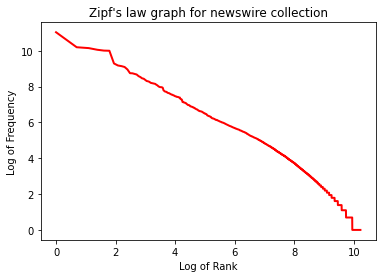

In [ ]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.
import matplotlib.pyplot as plt

rank = [item for item in range(1, len(terms_)+1)] #creates a list of ranks equivalent to size of the terms_ list
rank =  [math.log(x) for x in rank] #gets the log of rank
frequency_ =  [math.log(x) for x in frequency] #gets the log of frequency

plt.plot(rank,frequency_, linewidth=2, color='r')
plt.xlabel("Log of Rank")
plt.ylabel("Log of Frequency")
plt.title("Zipf's law graph for newswire collection")
plt.show()



## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [ ]:
# TODO: Data acquisition code here.
import requests 
from bs4 import BeautifulSoup #python ibrary for web scraping

#I have acquired 3 documents from web links (html). The content of these documents is centered around music.
# Below I extract the text in each html document using the BeautifulSoup python library.
#i extract text from the title as well as the body of each document
# The texts content is mainly returned as full sentences so I will be doing a lot of breaking down and
#clean up in the tokenzing step in which I will also be removing empty strings, hyperlinks, and numbers. 

def data_acquisition(link):
  URL = link 
  r = requests.get(URL) 
  soup = BeautifulSoup(r.content, 'html5lib') #extracts html from link
  tag = soup.body #gets the body of the document
  list_of_words_body = []
  # loop finds all the text in the body tag 
  for string in tag.strings:
      list_of_words_body.append(string) #stores all the texts found in the body in a list
  tag = soup.title #gets the title of the document
  # loop finds all the text in the title tag
  list_of_words_title = []
  for string in tag.strings:
      list_of_words_title.append(string) #stores all the texts found in the title in a list
  return list_of_words_title, list_of_words_body[20:] #returns list of text in title and list of text in body for each document

docAtitle, docA_body = data_acquisition("https://pitchfork.com/reviews/albums/jose-gonzalez-local-valley/")
docBtitle, docB_body = data_acquisition("https://pitchfork.com/reviews/albums/sufjan-stevens-angelo-de-augustine-a-beginners-mind/")
docCtitle, docC_body = data_acquisition("https://pitchfork.com/reviews/albums/andy-shauf-wilds/")

#lists containing text in each document
print(docAtitle, docA_body[:10]) #just printing the first 10 items for you to see
print(docBtitle, docB_body[:10])
print(docCtitle, docC_body[:10])



['José González: Local Valley Album Review | Pitchfork'] ['Over/Under', 'Liner Notes', 'Under the Influences', 'On the Records', 'Critical Breakthroughs', 'Newsletter', 'Advertising', 'Masthead', 'Careers', 'Contact']
['Sufjan Stevens / Angelo De Augustine: A Beginner’s Mind Album Review | Pitchfork'] ['Over/Under', 'Liner Notes', 'Under the Influences', 'On the Records', 'Critical Breakthroughs', 'Newsletter', 'Advertising', 'Masthead', 'Careers', 'Contact']
['Andy Shauf: Wilds Album Review | Pitchfork'] ['Over/Under', 'Liner Notes', 'Under the Influences', 'On the Records', 'Critical Breakthroughs', 'Newsletter', 'Advertising', 'Masthead', 'Careers', 'Contact']


**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [ ]:
# TODO: Tokenization code here.

#the tokenzing function breaks the sentences (acquired form the previous step)
#into words and cleans up the data. It takes a list as input and removes whitespaces,
#removes any non-alphabets such as commas, question marks, full stops, brackets etc around words.
#it also removes number and hyperlinks. And lastly, it converts all the words into lowercase

#the create_count fnction takes a list of words and converts it into a list of dictionaries
#where each dictionary contain count of each term (same format as sample data). Each dictionary 
#contains the term, count, document name and word position in 
#document (different word positions (fields) in the dictionaries are body and title). 

def create_count(new_list, doc_name,position):
  #term_count will be a list of dictionarie where each dictionary will contain count for each term in each document.
  term_count = [] 
  words_so_far = []
  for i, val in enumerate(new_list):
    if val not in words_so_far :
      #create dicitonary for each word (in each document in each position) with an intial count 1
      term_count.append({'count': 1, 'field': position, 'id': doc_name, 'term': val})
      words_so_far.append(val)
    else:
      a = words_so_far.index(val)
      val_found = term_count[a]
      val_found['count'] = val_found['count'] + 1 #adds 1 to count for term each time it comes accross a word that it already in dict
  return term_count

def tokenizing(doc, doc_name, position):
  list_of_words_body_ = []
  for i,val in enumerate(doc):
    list_of_words_body_.append(val.strip()) #removes white spaces around words
  for i,val in enumerate(list_of_words_body_):
    if (val == ''):
      list_of_words_body_.remove(val)
    elif (val[0].isalpha() == False): #removes everything that does not start with a letter 
      list_of_words_body_.remove(val) 
  new_list = []
  for i,val in enumerate(list_of_words_body_):
      temp = val.split(" ")
      for j in temp:
        #below removes empty strings, numbers and hyeperlinks from the content to keep.
        if j == "" or j == '' or j.isnumeric() == True or j[0:4] == "https":
          break
        #removes things like commas, question marks and full stops etc from each word 
        if j[0].isalpha() == False:
          j = j[1:]
        elif j[-1].isalpha() == False:
          j = j[:-1]
        if len(j) != 0:
          new_list.append(j.lower()) #converts each word to lower case
  return create_count(new_list,doc_name,position)

term_count_1 = tokenizing(docA_body, "documentA","body")
term_count_1_title = tokenizing(docAtitle, "documentA","title")
term_count_2 = tokenizing(docB_body, "documentB", "body")
term_count_2_title = tokenizing(docBtitle, "documentB","title")
term_count_3 = tokenizing(docC_body, "documentC","body")
term_count_3_title = tokenizing(docCtitle, "documentC","title")
#lastly we merge all the lists from different documents into one. 
term_count = term_count_1 + term_count_1_title + term_count_2 + term_count_2_title + term_count_3 + term_count_3_title
df = pd.DataFrame(term_count) #contains word counts from all 3 documents
print(df)

      count  field         id        term
0         1   body  documentA  over/under
1         1   body  documentA       liner
2         1   body  documentA       notes
3         1   body  documentA       under
4        43   body  documentA         the
...     ...    ...        ...         ...
1705      1  title  documentC       shauf
1706      1  title  documentC       wilds
1707      1  title  documentC       album
1708      1  title  documentC      review
1709      1  title  documentC   pitchfork

[1710 rows x 4 columns]


**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

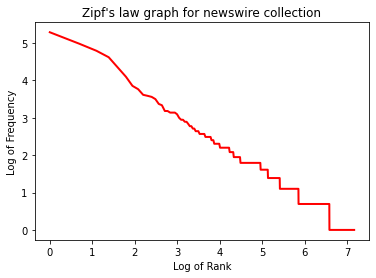

In [ ]:
df_1 = df.groupby('term').sum()
df_2 = df_1.sort_values(by='count', ascending=False)
terms_ = df_2.index.tolist() #contains the terms in decreasing order of their counts 
frequency = df_2['count'].tolist() #gets frequency of the terms in the above list (in order)

import matplotlib.pyplot as plt

rank = [item for item in range(1, len(terms_)+1)] #creates a list of ranks equivalent to size of the terms_ list
rank =  [math.log(x) for x in rank] #gets the log of rank
frequency_ =  [math.log(x) for x in frequency] #gets the log of frequency

plt.plot(rank,frequency_, linewidth=2, color='r')
plt.xlabel("Log of Rank")
plt.ylabel("Log of Frequency")
plt.title("Zipf's law graph for newswire collection")
plt.show()

#the distribution for both the sample collection and my collection are of the same pattern
#in terms of log frequecy decreasing as the rank increases. 
#the sample collection's graph is smoother while mine is slightly bumpier. 

#done!